## import necessary libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load data and get info

In [2]:
df = pd.read_csv('/kaggle/input/noshowappointments/KaggleV2-May-2016.csv')
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.shape

(110527, 14)

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
df.duplicated().sum()

0

In [8]:
# num of unique values
df['PatientId'].value_counts().count()

62299

In [9]:
df.duplicated(['PatientId','No-show']).sum()

38710

there is 38710 duplicated data,will remove them

In [10]:
ag = df[df['Age'] == -1]
ag

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


## Data Cleaning

In [11]:
df.drop(index=99832,inplace=True)

In [12]:
df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [13]:
df.drop_duplicates(['PatientId', 'No-show'], inplace=True)

In [14]:
df.shape

(71816, 14)

In [15]:
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)

In [16]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## General look about data

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Scholarship'}>,
        <Axes: title={'center': 'Hipertension'}>],
       [<Axes: title={'center': 'Diabetes'}>,
        <Axes: title={'center': 'Alcoholism'}>,
        <Axes: title={'center': 'Handcap'}>],
       [<Axes: title={'center': 'SMS_received'}>, <Axes: >, <Axes: >]],
      dtype=object)

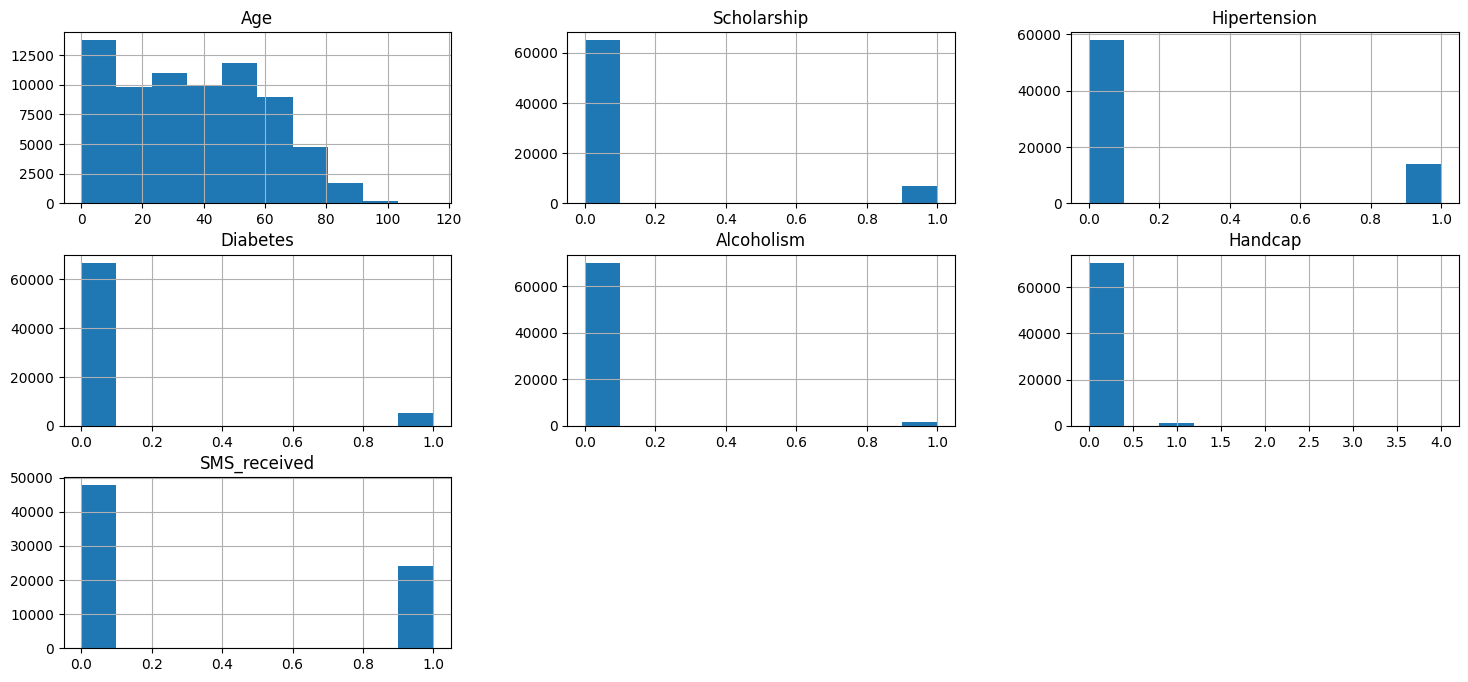

In [17]:
df.hist(figsize=(18,8))

In [18]:
show = df['No-show'] == 'No'
noshow = df['No-show'] == 'Yes'

In [19]:
df[show].count()

Gender           54153
Age              54153
Neighbourhood    54153
Scholarship      54153
Hipertension     54153
Diabetes         54153
Alcoholism       54153
Handcap          54153
SMS_received     54153
No-show          54153
dtype: int64

In [20]:
df[noshow].count()

Gender           17663
Age              17663
Neighbourhood    17663
Scholarship      17663
Hipertension     17663
Diabetes         17663
Alcoholism       17663
Handcap          17663
SMS_received     17663
No-show          17663
dtype: int64

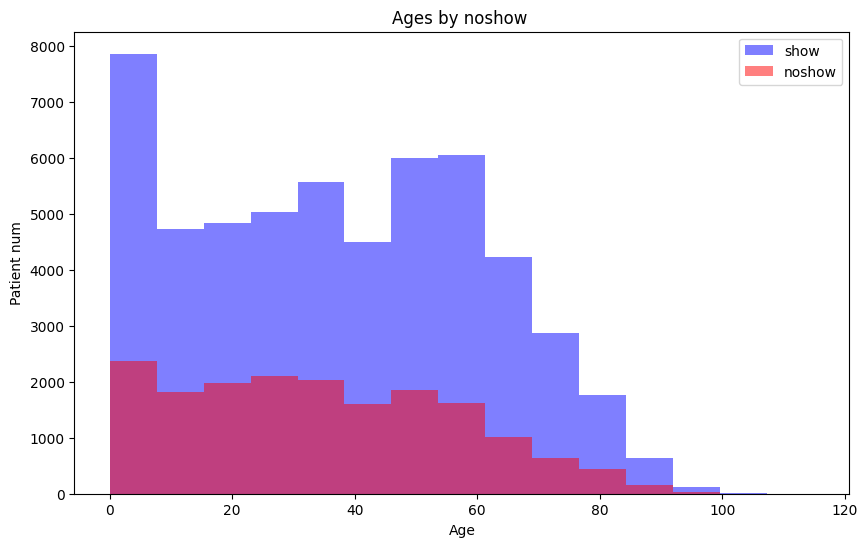

In [21]:
# age affect noshow status
plt.figure(figsize=(10, 6))
plt.hist(df[show]['Age'], bins=15, color='blue', alpha=0.5, label='show')
plt.hist(df[noshow]['Age'], bins=15, color='red', alpha=0.5, label='noshow')

plt.title('Ages by noshow ')
plt.xlabel('Age')
plt.ylabel('Patient num')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

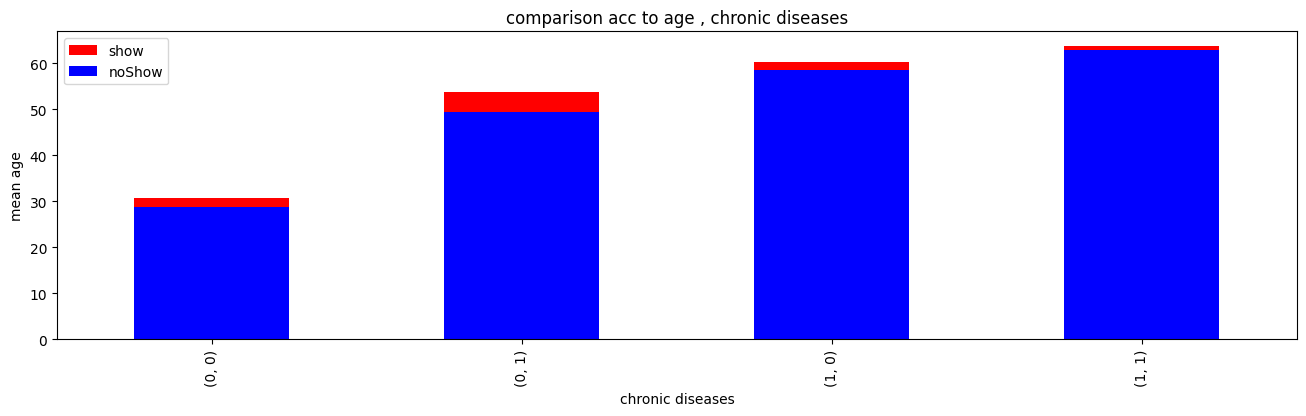

In [22]:
#does age and chronic diseases affect the attendance together
plt.figure(figsize=(16,4))
df[show].groupby(['Hipertension','Diabetes'])['Age'].mean().plot(kind = 'bar',color='red', label= 'show')
df[noshow].groupby(['Hipertension','Diabetes'])['Age'].mean().plot(kind = 'bar',color='blue', label= 'noShow')
plt.title('comparison acc to age , chronic diseases')
plt.xlabel('chronic diseases')
plt.ylabel('mean age')
plt.legend()
plt.show

In [23]:
df[show].groupby(['Hipertension','Diabetes'])['Age'].mean()

Hipertension  Diabetes
0             0           30.713360
              1           53.701370
1             0           60.270517
              1           63.764303
Name: Age, dtype: float64

In [24]:
df[noshow].groupby(['Hipertension','Diabetes'])['Age'].mean()

Hipertension  Diabetes
0             0           28.768691
              1           49.481172
1             0           58.650380
              1           62.913282
Name: Age, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

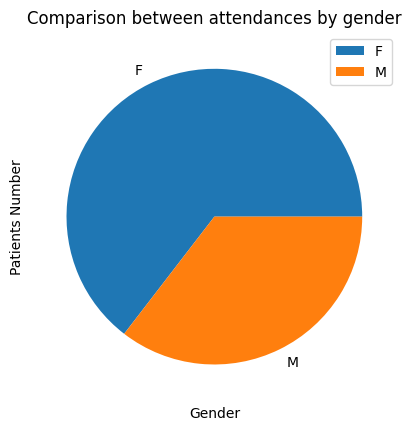

In [25]:
df['Gender'][show].value_counts(normalize=True).plot(kind='pie', label = 'show')
plt.title('Comparison between attendances by gender')
plt.xlabel('Gender')
plt.ylabel('Patients Number')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

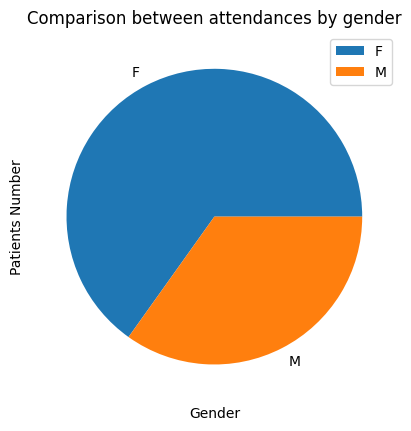

In [26]:
df['Gender'][noshow].value_counts(normalize=True).plot(kind='pie', label = 'show')
plt.title('Comparison between attendances by gender')
plt.xlabel('Gender')
plt.ylabel('Patients Number')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

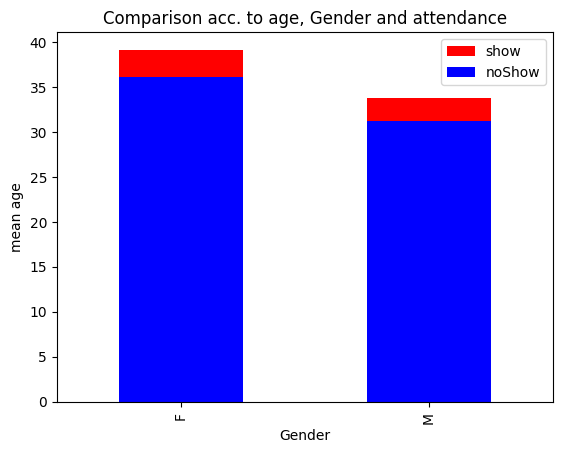

In [27]:
df[show].groupby('Gender')['Age'].mean().plot(kind='bar', color = 'red', label = 'show')
df[noshow].groupby('Gender')['Age'].mean().plot(kind='bar', color = 'blue',label = 'noShow')

plt.title('Comparison acc. to age, Gender and attendance')
plt.xlabel('Gender')
plt.ylabel('mean age')
plt.legend()
plt.show

In [28]:
df[show].groupby('Gender')['Age'].mean()

Gender
F    39.130292
M    33.766269
Name: Age, dtype: float64

In [29]:
df[noshow].groupby('Gender')['Age'].mean()

Gender
F    36.06501
M    31.22040
Name: Age, dtype: float64

In [30]:
df[show].groupby('Gender')['Age'].median()

Gender
F    39.0
M    32.0
Name: Age, dtype: float64

In [31]:
df[noshow].groupby('Gender')['Age'].median()

Gender
F    34.0
M    29.0
Name: Age, dtype: float64

There is no correlation between age and gender affecting the show rate. The mean of gender ages are almost the same

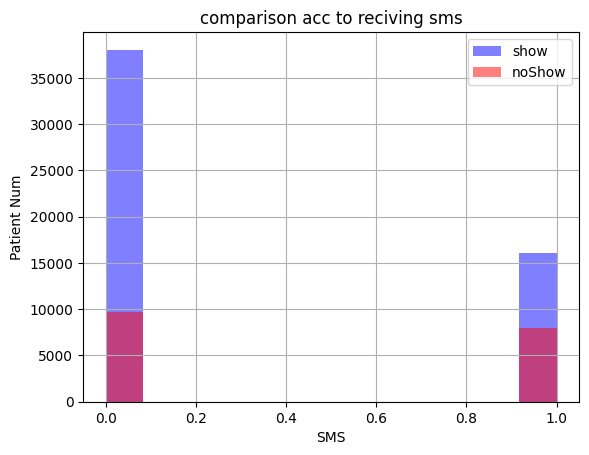

In [32]:
# does reciving sms affect the attend
df['SMS_received'][show].hist(alpha = .5, bins = 12, color = 'blue', label = 'show')
df['SMS_received'][noshow].hist(alpha = .5, bins = 12, color = 'red', label = 'noShow')

plt.title('comparison acc to reciving sms')
plt.xlabel('SMS')
plt.ylabel('Patient Num')
plt.legend()
plt.show()

Number of showing patients without reciving sms is greater than showing patients with reciving sms, which mean that we need to revisit our sms campaign

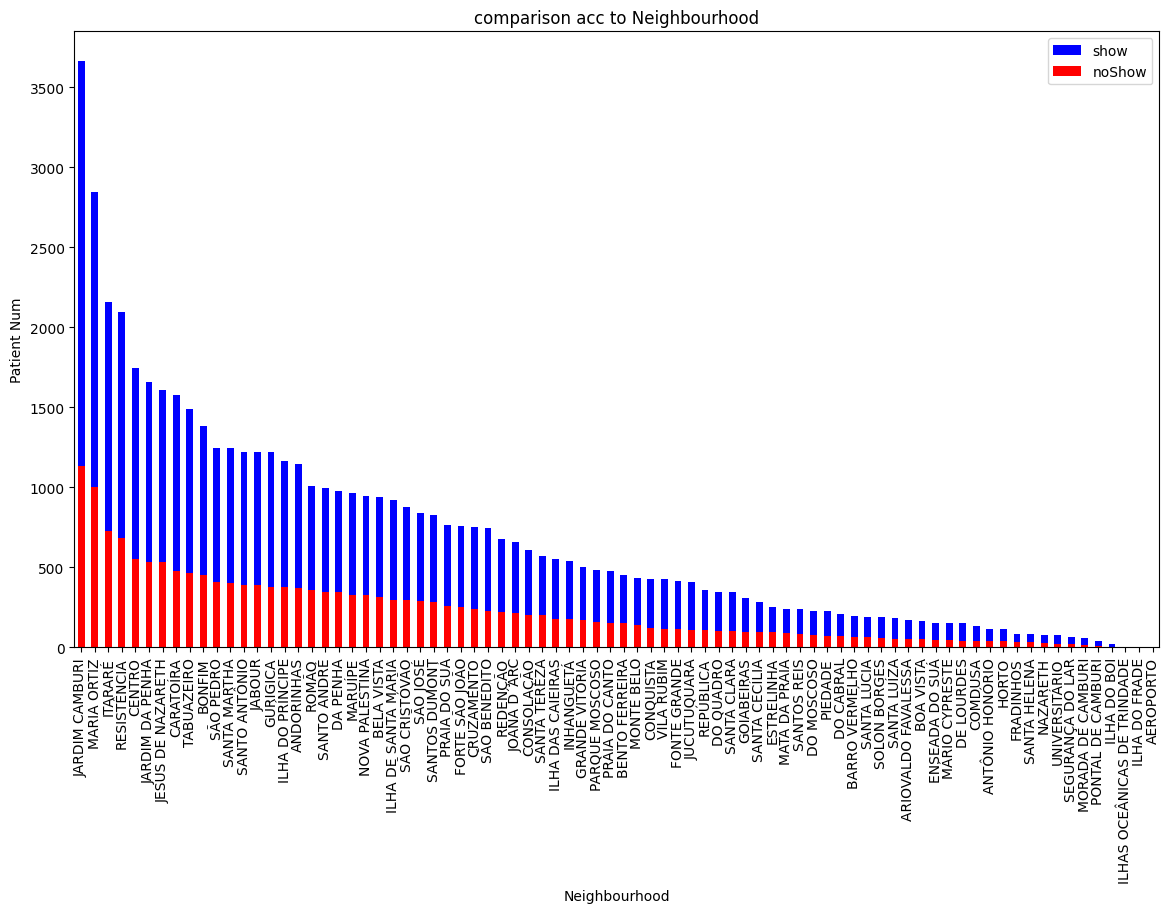

In [33]:
#does neighbourhood affect the attendance
plt.figure(figsize=(14,8))
df['Neighbourhood'][show].value_counts().plot(kind='bar', color = 'blue', label = 'show')
df['Neighbourhood'][noshow].value_counts().plot(kind='bar', color = 'red', label = 'noShow')

plt.title('comparison acc to Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Patient Num')
plt.legend()
plt.show()

This means neighbourhood has a great affect on the attendance

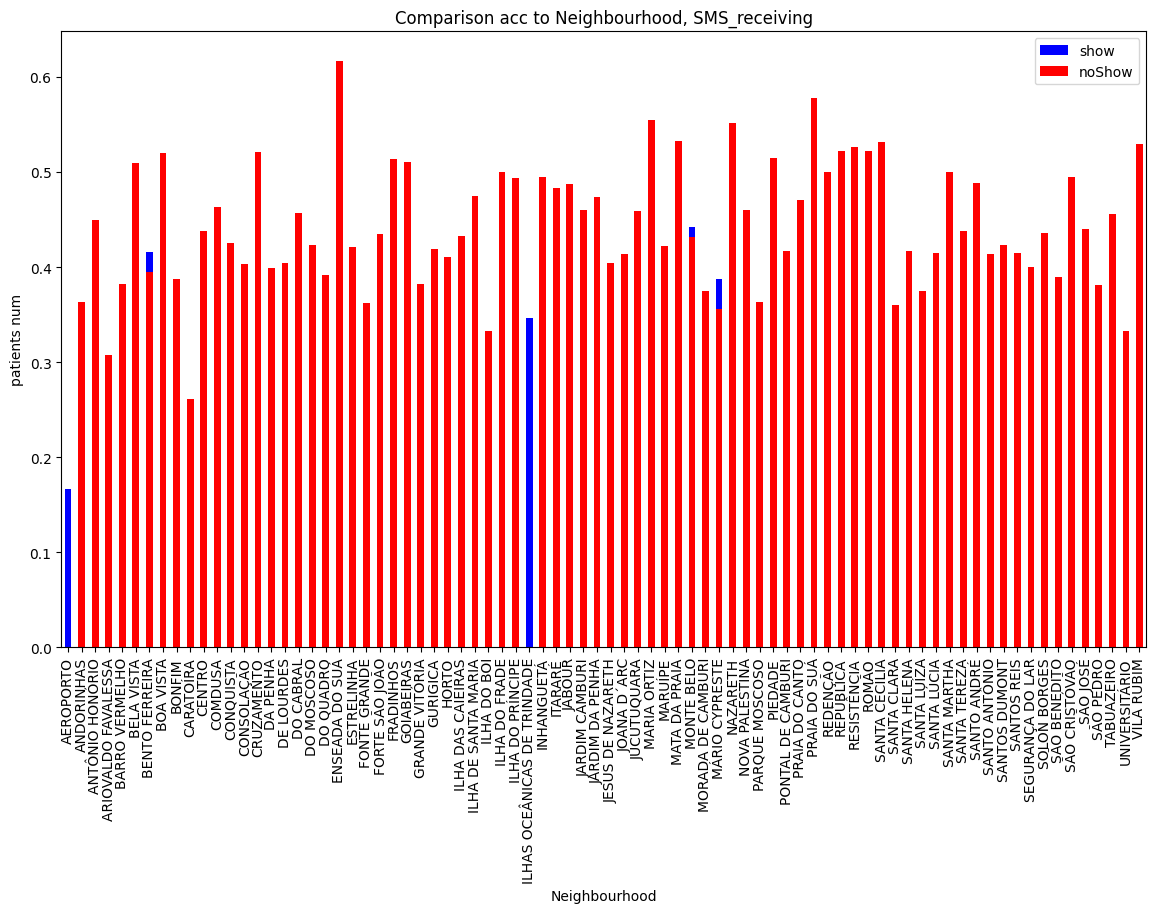

In [34]:
plt.figure(figsize=(14,8))
df[show].groupby('Neighbourhood').SMS_received.mean().plot(kind = 'bar', color = 'blue', label = 'show')
df[noshow].groupby('Neighbourhood').SMS_received.mean().plot(kind = 'bar', color = 'red', label = 'noShow')

plt.title('Comparison acc to Neighbourhood, SMS_receiving')
plt.xlabel('Neighbourhood')
plt.ylabel('patients num')
plt.legend()
plt.show()

SMS has response in only 5 neighbourhoods

<function matplotlib.pyplot.show(close=None, block=None)>

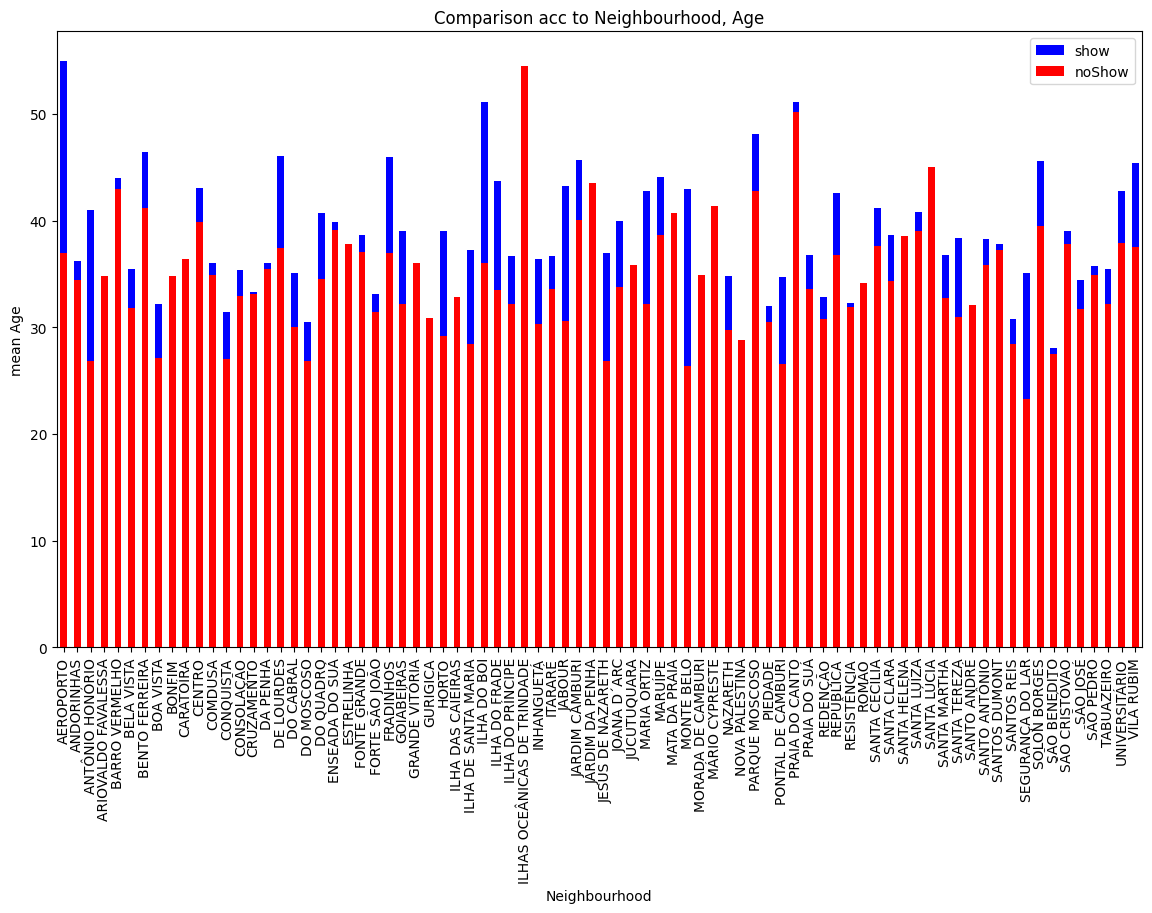

In [35]:
plt.figure(figsize=(14,8))
df[show].groupby('Neighbourhood').Age.mean().plot(kind = 'bar', color = 'blue', label = 'show')
df[noshow].groupby('Neighbourhood').Age.mean().plot(kind = 'bar', color = 'red', label = 'noShow')

plt.title('Comparison acc to Neighbourhood, Age')
plt.xlabel('Neighbourhood')
plt.ylabel('mean Age')
plt.legend()
plt.show

Patients attendance from specific neighbourhood differ according to ages

## Conclusions:

Neighbourhood has a great effect on attendance or not.

Number of showing patients from specific neighbourhood affected by receving SMS and ages.

Age has a clear influence on the showing rate.

Number of showing patients without reciving sms is greater than showing patients with reciving sms, which mean that we need to revisit our sms campaign.

No clear correlation between showing and gender, chronic diseases, enrollement in the welfare program.